In [7]:
from scipy import misc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
run_base_dir = 'C:/data/robot_arm_data/'
test_img = 'Run1/image12.jpg'
test_ctrl = 'Run1/data12.txt'

(480, 720, 3)


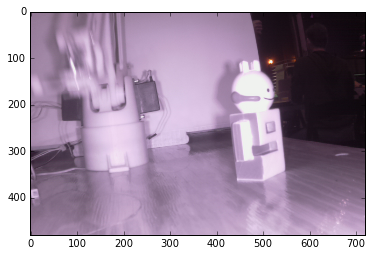

In [8]:
img = mpimg.imread(run_base_dir + test_img)
print(img.shape)
imgplot = plt.imshow(img)


In [14]:
import pandas as pd
ctrl = pd.read_csv(run_base_dir + test_ctrl, header=None)
print(ctrl)
print(ctrl[3])

        0  1      2   3     4  5     6   7
0  swivel  0  reach  70  lift  6  claw -90
0    70
Name: 3, dtype: int64


In [19]:
example = img
label = [ctrl[1][0], ctrl[3][0], ctrl[5][0], ctrl[7][0]]
print(label)
train_example = [example, label]
#print(train_example)

[0, 70, 6, -90]


In [30]:
def Create_FQ_Label(RunName, RunLength):
    example_paths = []
    labels = []
    for i in range(0,RunLength):
        try:        
            ctrl = pd.read_csv(run_base_dir + RunName + '/data' + str(i) + '.txt', header=None)
            label = [ctrl[1][0], ctrl[3][0], ctrl[5][0], ctrl[7][0]]
            labels.append(label)
            example_paths.append(run_base_dir + RunName + '/image' + str(i) + '.jpg')
        except:
            print('bad data file: ' + str(i))
    run1_data = {'examplepath': example_paths, 'label': labels}
    run1_df = pd.DataFrame(run1_data)
    run1_df.to_csv(run_base_dir + 'fqlabels/' + RunName + '.csv', index=False)


Create_FQ_Label('Run4', 53)
Create_FQ_Label('Run5', 16)
Create_FQ_Label('Run8', 18)
Create_FQ_Label('Run9', 24)

bad data file: 2
bad data file: 10
bad data file: 11
bad data file: 12
bad data file: 13
bad data file: 14
bad data file: 15
bad data file: 16
